In [1]:
import os
import sys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

root_dir = os.environ.get("ROOT_PATH")
if not root_dir in sys.path: sys.path.append(root_dir)
from src.utils.constants import *

/var/folders/50/_r7c0z0x3bl4zx6npn1b1x480000gn/T/ipykernel_1600/2620236641.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mock_df.loc[:, 'zhelio'] = mock_df.loc[:, 'cz'] / LIGHTSPEED


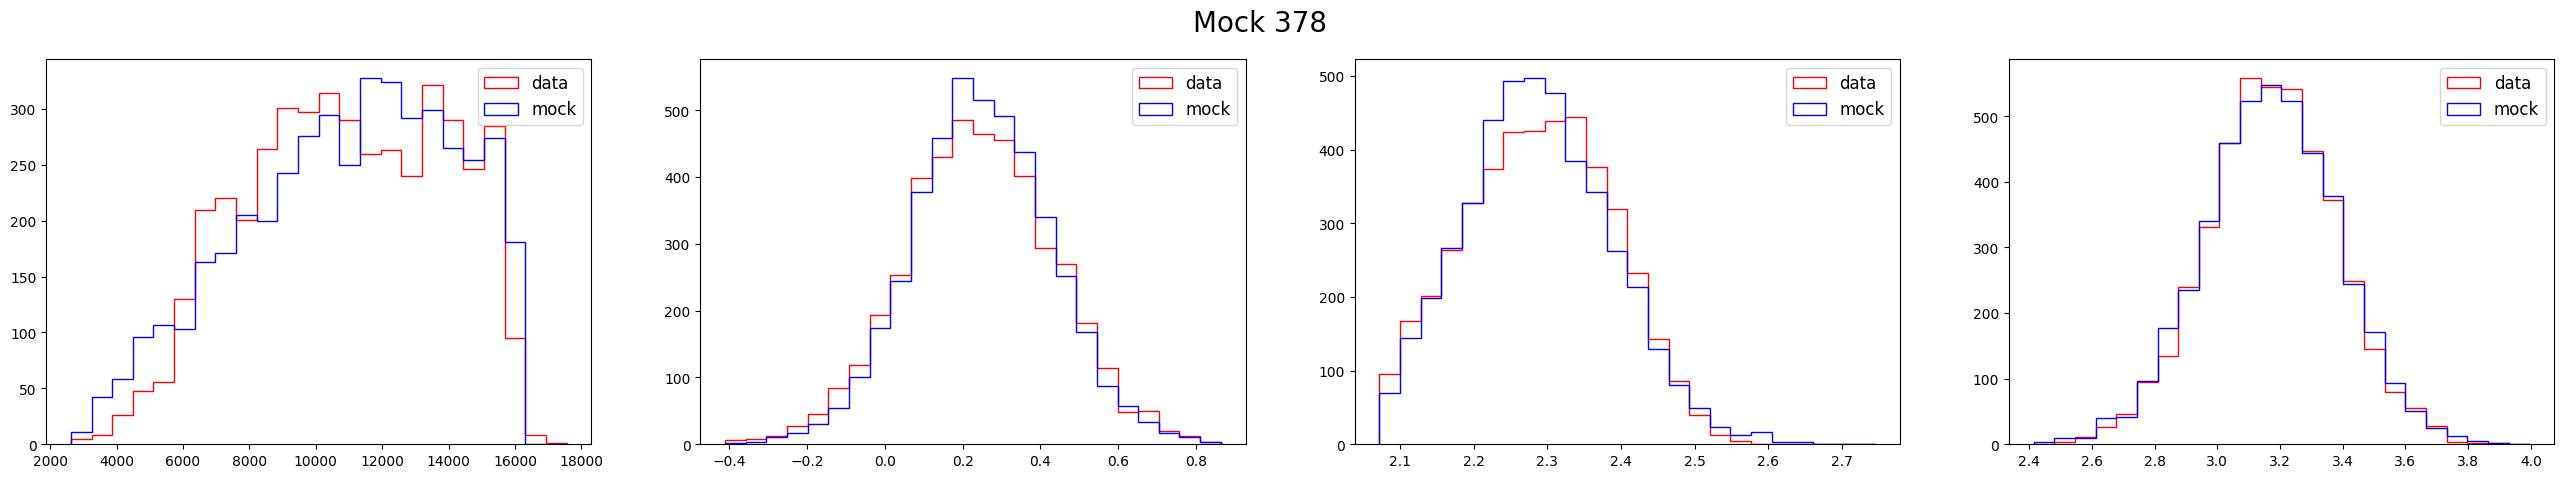

In [60]:
survey = "SDSS"
mock_id = random.randint(1, 500)

# Load mocks and data
full_mocks_df = pd.read_csv(f'../src/mocks/GENRMOCKFP_{survey}/smin_setting_1_mock.txt', delim_whitespace=True)
mock_df = full_mocks_df[full_mocks_df['#mockgal_ID'].apply(lambda x: x.split('_')[1] == str(mock_id))]
mock_df.loc[:, 'zhelio'] = mock_df.loc[:, 'cz'] / LIGHTSPEED

data_df = pd.read_csv(f'../data/foundation/fp_sample_final/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv')
data_df['cz'] = data_df['zhelio'] * LIGHTSPEED

# Plot redshift, magnitude, and FP observables distributions
columns_ = ["cz", "r", "s", "i"]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(FIGURE_WIDTH * 4, FIGURE_HEIGHT))

for i, ax in enumerate(fig.axes):
    col = columns_[i]
    xlim_min = min(mock_df[col].min(), data_df[col].min())
    xlim_max = max(mock_df[col].max(), data_df[col].max())
    bins_ = np.linspace(xlim_min, xlim_max, 25)

    ax.hist(data_df[columns_[i]], bins=bins_, color='red', histtype='step', label='data')
    ax.hist(mock_df[columns_[i]], bins=bins_, color='blue', histtype='step', label='mock')

    ax.legend(fontsize=12)
    fig.suptitle(f"Mock {mock_id}", fontsize=20)
    

In [4]:
import re

mock_galaxies_path = os.path.join(ROOT_PATH, f"data/mocks/mock_galaxies")

mock_filename = os.listdir(mock_galaxies_path)[0]

# Use regular expressions to find the integers after "smin" and "fp_fit_method"
survey = mock_filename.split('_')[0]
smin_value = int(re.search(r"smin_(\d+)", mock_filename).group(1))
fp_fit_method_value = int(re.search(r"fp_fit_method_(\d+)", mock_filename).group(1))

survey, smin_value, fp_fit_method_value

('lamost', 1, 0)